# Polarising alleles in all Amajus chromosomes

In [2]:
library(data.table)
library(dplyr)
library(foreach)
library(doParallel)
library(tictoc)

source("~/snap_hap/Amajus_alleles-ancestral/_scripts/functions_polarisation.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: iterators

Loading required package: parallel


Attaching package: ‘tictoc’


The following object is masked from ‘package:data.table’:

    shift




## misc: trial parallel computing chromSegments

In [2]:
numCores = parallel::detectCores()
numCores
myCluster = parallel::makeCluster(8)
doParallel::registerDoParallel(myCluster)

[1] 24

In [3]:
foreach::getDoParRegistered()
foreach::getDoParWorkers()

[1] TRUE

[1] 8

In [7]:
tic()
alleleSequence =  c('A','T','C','G','N','del')
baseDIR = '~/snap_hap/Amajus_alleles-ancestral'
chrom='Chr6'

filepath_chromSegment = file.path('~/snap_hap/ref_genome/chromSegments', paste0(chrom,'_segments.txt'))
filepath_syncFile = file.path('~/snap_hap/Amolle_syncFiles', paste0(chrom,'.sync'))
filepath_posFile = file.path(baseDIR,'pos', paste0('stitchRun1_', chrom, '.final.pos'))

x = foreach(segment = 1:nrow(chromSegments),
       .combine = cbind
       ) %dopar% {
    start = chromSegments[segment, 1]
    end = chromSegments[segment, 2]
    c(start,end)
    # alleleDat_raw = merge_seqData(syncFile, posFile, start, end)
    # alleleDat_processed = compile_AlleleDat(alleleSequence, alleleDat_raw)
    # as.data.table(alleleDat_processed)
}
toc()
print(x)

0.076 sec elapsed
     result.1 result.2 result.3 result.4 result.5
[1,]    11001    12001    13001    14001    15001
[2,]    12000    13000    14000    15000    16000


## Trial: chromSegments

In [ ]:
alleleSequence =  c('A','T','C','G','N','del')
baseDIR = '~/snap_hap'

In [ ]:
chromSegments = fread('~/snap_hap/ref_genome/chromSegments/Chr6_segments.txt')
syncFile = fread('~/snap_hap/Amolle_syncFiles/Chr6.sync')
posFile = fread('~/snap_hap/Amajus_alleles-ancestral/pos/stitchRun1_Chr6.final.pos')

In [ ]:
chrom='Chr6'
alleleDat_chr6 = compile_AlleleDat_chromSegments(alleleSequence, baseDIR, chrom, 'stitchRun1')

In [ ]:
alleleSequence =  c('A','T','C','G','N','del')
baseDIR = '~/snap_hap/Amajus_alleles-ancestral'
chrom='Chr6'
filepath_syncFile = file.path('~/snap_hap/Amolle_syncFiles', paste0(chrom,'.sync'))
filepath_posFile = file.path(baseDIR,'pos', paste0('stitchRun1_', chrom, '.final.pos'))

chromSegments = data.frame(V1 = c(11001,12001), V2 = c(12000,13000))
# chromSegments = fread(filepath_chromSegment)
syncFile = fread(filepath_syncFile)
posFile = fread(filepath_posFile)

## Run in bash: Process all segments

## Count the no of sites with allele polarisation class

### Chr1

In [2]:
## Chr1
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr1.csv', header=T)
# str(alleleDat)

In [3]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
# nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
# nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 2940701


Total no. of sites with no A.molle information

[1] 148669


Total no. of sites with 1 A.molle allele

[1] 1917602

[1] 7202

[1] 1910400

[1] 1728987

[1] 181413


Total no. of sites with 2 A.molle alleles

[1] 311

[1] 115508

[1] 6140

[1] 510521

[1] 177937


Total no. of sites with 3 A.molle alleles

[1] 7

[1] 4072

[1] 0

[1] 18996

[1] 38065


Total no. of sites with 4 A.molle alleles

[1] 2776

[1] 0

[1] 84

[1] 0

[1] 1299

[1] 1393


Total no. of sites with >4 A.molle alleles

[1] 97

[1] 0

[1] 0

[1] 0

[1] 50

[1] 47

### Chr2

In [4]:
## Chr2
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr2.csv', header=T)
# str(alleleDat)

In [5]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 3301920


Total no. of sites with no A.molle information

[1] 233086


Total no. of sites with 1 A.molle allele

[1] 2160371

[1] 9682

[1] 1915987

[1] 234702


Total no. of sites with 2 A.molle alleles

[1] 838219

[1] 436

[1] 134779

[1] 7586

[1] 526242

[1] 169176


Total no. of sites with 3 A.molle alleles

[1] 66824

[1] 9

[1] 5111

[1] 0

[1] 21156

[1] 40548


Total no. of sites with 4 A.molle alleles

[1] 3322

[1] 0

[1] 90

[1] 0

[1] 1582

[1] 1650


Total no. of sites with >4 A.molle alleles

[1] 98

[1] 0

[1] 0

[1] 0

[1] 52

[1] 46

### Chr3

In [6]:
## Chr3
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr3.csv', header=T)
# str(alleleDat)

In [7]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 2600018


Total no. of sites with no A.molle information

[1] 118071


Total no. of sites with 1 A.molle allele

[1] 1640546

[1] 4753

[1] 1502857

[1] 132936


Total no. of sites with 2 A.molle alleles

[1] 775669

[1] 178

[1] 104746

[1] 8284

[1] 478647

[1] 183814


Total no. of sites with 3 A.molle alleles

[1] 62475

[1] 9

[1] 4029

[1] 0

[1] 20150

[1] 38287


Total no. of sites with 4 A.molle alleles

[1] 3159

[1] 0

[1] 100

[1] 0

[1] 1530

[1] 1529


Total no. of sites with >4 A.molle alleles

[1] 98

[1] 0

[1] 0

[1] 0

[1] 55

[1] 43

### Chr4

In [8]:
## Chr4
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr4.csv', header=T)
# str(alleleDat)

In [9]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 2317799


Total no. of sites with no A.molle information

[1] 188953


Total no. of sites with 1 A.molle allele

[1] 1505355

[1] 6717

[1] 1366538

[1] 132100


Total no. of sites with 2 A.molle alleles

[1] 575569

[1] 279

[1] 90411

[1] 5568

[1] 352384

[1] 126927


Total no. of sites with 3 A.molle alleles

[1] 45533

[1] 2

[1] 3430

[1] 0

[1] 13903

[1] 28198


Total no. of sites with 4 A.molle alleles

[1] 2305

[1] 0

[1] 76

[1] 0

[1] 1071

[1] 1158


Total no. of sites with >4 A.molle alleles

[1] 84

[1] 0

[1] 0

[1] 0

[1] 48

[1] 36

### Chr5

In [29]:
## Chr5
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr5.csv', header=T)
# str(alleleDat)

In [30]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 3277515


Total no. of sites with no A.molle information

[1] 180041


Total no. of sites with 1 A.molle allele

[1] 2070153

[1] 5433

[1] 1910641

[1] 154079


Total no. of sites with 2 A.molle alleles

[1] 946244

[1] 225

[1] 133141

[1] 11008

[1] 581084

[1] 220786


Total no. of sites with 3 A.molle alleles

[1] 77099

[1] 5

[1] 5204

[1] 0

[1] 25146

[1] 46744


Total no. of sites with 4 A.molle alleles

[1] 3827

[1] 0

[1] 108

[1] 0

[1] 1820

[1] 1899


Total no. of sites with >4 A.molle alleles

[1] 151

[1] 0

[1] 0

[1] 0

[1] 94

[1] 57

### Chr6

In [16]:
## Chr6
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr6.csv', header=T)
# str(alleleDat)

In [17]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 2533823


Total no. of sites with no A.molle information

[1] 193696


Total no. of sites with 1 A.molle allele

[1] 1657077

[1] 6952

[1] 1496429

[1] 153696


Total no. of sites with 2 A.molle alleles

[1] 629525

[1] 318

[1] 101161

[1] 6564

[1] 387388

[1] 134094


Total no. of sites with 3 A.molle alleles

[1] 50771

[1] 4

[1] 3747

[1] 0

[1] 16670

[1] 30350


Total no. of sites with 4 A.molle alleles

[1] 2666

[1] 0

[1] 96

[1] 0

[1] 1285

[1] 1285


Total no. of sites with >4 A.molle alleles

[1] 88

[1] 0

[1] 0

[1] 0

[1] 47

[1] 41

### Chr7

In [22]:
## Chr7
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr7.csv', header=T)
# str(alleleDat)

In [23]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 2358818


Total no. of sites with no A.molle information

[1] 150312


Total no. of sites with 1 A.molle allele

[1] 1484051

[1] 4204

[1] 1376737

[1] 103110


Total no. of sites with 2 A.molle alleles

[1] 667769

[1] 169

[1] 90810

[1] 8153

[1] 414640

[1] 153997


Total no. of sites with 3 A.molle alleles

[1] 53832

[1] 5

[1] 3537

[1] 0

[1] 17408

[1] 32882


Total no. of sites with 4 A.molle alleles

[1] 2775

[1] 0

[1] 76

[1] 0

[1] 1279

[1] 1420


Total no. of sites with >4 A.molle alleles

[1] 79

[1] 0

[1] 0

[1] 0

[1] 44

[1] 35

### Chr8

In [27]:
## Chr8
alleleDat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr8.csv', header=T)
# str(alleleDat)

In [28]:
cat('\nTotal no. of sites')
nrow(alleleDat)

#
cat('\nTotal no. of sites with no A.molle information')
nrow(alleleDat[pool_numAlleles == 0])
# nrow(alleleDat[pool_numAlleles != 0])

#
cat('\nTotal no. of sites with 1 A.molle allele')
nrow(alleleDat[pool_numAlleles == 1])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 1])
# nrow(alleleDat[pool_numAlleles == 1][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 1][pool_check == 0][check_minAllele == 1])

#
cat('\nTotal no. of sites with 2 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 2])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 1][pool_alleleShared != 'none'])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 2][pool_check == 0][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 3 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 3])
# nrow(alleleDat[pool_numAlleles == 3][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 3][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with 4 A.molle alleles')
nrow(alleleDat[pool_numAlleles == 4])
# nrow(alleleDat[pool_numAlleles == 4][pool_check == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles == 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])

#
cat('\nTotal no. of sites with >4 A.molle alleles')
nrow(alleleDat[pool_numAlleles > 4])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared == 'none'])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][pool_alleleShared %in% c('A','T','C','G')])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq == 0.5])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 0])
nrow(alleleDat[pool_numAlleles > 4][pool_check == 1][!pool_alleleShared %in% c('A','T','C','G','none',NA)][pool_minFreq != 0.5][check_minAllele == 1])



Total no. of sites

[1] 2765149


Total no. of sites with no A.molle information

[1] 178211


Total no. of sites with 1 A.molle allele

[1] 1792188

[1] 5218

[1] 1646688

[1] 140282


Total no. of sites with 2 A.molle alleles

[1] 730961

[1] 218

[1] 116302

[1] 9567

[1] 442500

[1] 162374


Total no. of sites with 3 A.molle alleles

[1] 60620

[1] 2

[1] 4484

[1] 0

[1] 20135

[1] 35999


Total no. of sites with 4 A.molle alleles

[1] 3075

[1] 0

[1] 84

[1] 0

[1] 1510

[1] 1481


Total no. of sites with >4 A.molle alleles

[1] 94

[1] 0

[1] 0

[1] 0

[1] 55

[1] 39

## Summarising read depth for poolseq

In [7]:
alleleDat = foreach(chrom = c(1:8), .combine = rbind) %do% {
    file = file.path('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom', paste0('alleleDat_Chr', chrom, '.csv'))
    dat = fread('~/snap_hap/Amajus_alleles-ancestral/alleleDat_chrom/alleleDat_Chr1.csv', header=T)
    dat
}

In [5]:
a = data.frame(V1=1:10, V2=1:10)
b = data.frame(V1=1:10, V2=1:10)
rbind(a,b)

V1,V2
<int>,<int>
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [8]:
str(alleleDat)

Classes ‘data.table’ and 'data.frame':	23525608 obs. of  31 variables:
 $ pos               : int  3817 3850 3873 3881 3917 3922 3946 3981 3992 3994 ...
 $ chrom             : chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ ref               : chr  "C" "T" "T" "T" ...
 $ alt               : chr  "G" "C" "C" "C" ...
 $ AN                : int  2146 2146 2148 2148 2148 2148 2148 2148 2148 2146 ...
 $ AC                : int  1651 1781 9 1 1174 1181 63 63 1331 711 ...
 $ pop1              : chr  "0:0:0:0:0:0" "" "" "" ...
 $ pop2              : chr  "0:0:1:0:0:0" "" "" "" ...
 $ pop3              : chr  "0:0:0:0:0:0" "" "" "" ...
 $ Amajus_refFreq    : num  0.231 0.17 0.996 1 0.453 ...
 $ Amajus_altFreq    : num  0.769338 0.829916 0.00419 0.000466 0.546555 ...
 $ Amajus_majFreq    : num  0.769 0.83 0.996 1 0.547 ...
 $ Amajus_majAllele  : chr  "G" "C" "T" "T" ...
 $ Amajus_minFreq    : num  0.230662 0.170084 0.00419 0.000466 0.453445 ...
 $ Amajus_minAllele  : chr  "C" "T" "C" "C" ...
 $ pool    

In [10]:
cat("Mean read depth for poolseq data")
mean(alleleDat$pool_totalCounts)
median(alleleDat$pool_totalCounts)

Mean read depth for poolseq data

[1] 83.96687

[1] 93

In [12]:
summary(alleleDat$pool_totalCounts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   46.00   93.00   83.97  113.00 6822.00 

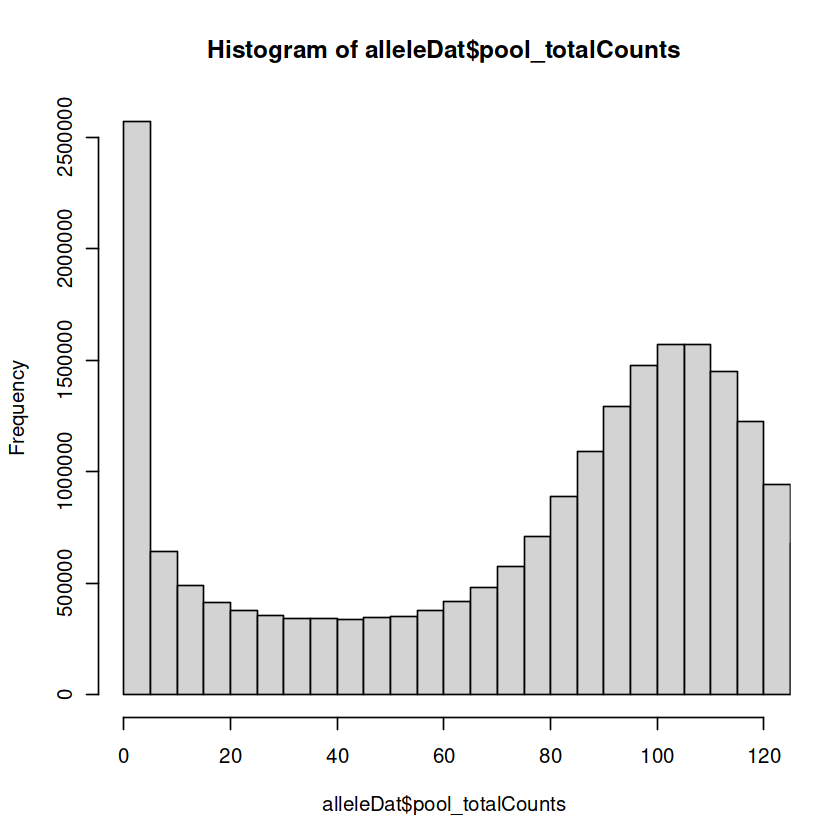

In [14]:
hist(alleleDat$pool_totalCounts, xlim=c(0,120), breaks = 1000)